## Installing libraries

In [1]:
%pip install -U "numpy<2.0"
%pip install -U tiktoken -q
%pip install langchain_community
%pip install sentence-transformers
%pip install langchain-huggingface
%pip install -U weaviate-client
%pip install -Uqq langchain-weaviate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 47.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Loading documents using folder structure, title and publication date as metadata.

In [2]:
from google.colab import userdata

In [ ]:
import sys
import os

module_path = os.path.abspath('/content/drive/MyDrive/Papadiamantis/code')
if module_path not in sys.path:
    sys.path.append(module_path)

from loading_documents import directory_to_documents, num_tokens_from_string

In [4]:
directory_path = "/content/drive/MyDrive/Papadiamantis/data"
documents = directory_to_documents(directory_path)

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 3/3 [00:03<00:00,  1.05s/it]
0it [00:00, ?it/s]
100%|██████████| 1/1 [00:00<00:00,  2.33it/s]
0it [00:00, ?it/s]
100%|██████████| 16/16 [00:07<00:00,  2.26it/s]


In [5]:
documents.keys()

dict_keys(['Άρθρα', 'Διηγήματα', 'Μυθιστορήματα', 'Ποιήματα'])

### Document Analysis

In [ ]:
import pandas as pd


documents_df = pd.DataFrame()
for key in documents.keys():
    df = pd.DataFrame([doc.metadata for doc in documents[key]])
    df['Κείμενο'] = [doc.page_content for doc in documents[key]]
    df['tokens'] = df['Κείμενο'].map(num_tokens_from_string)
    df['characters'] = df['Κείμενο'].map(len)
    documents_df = pd.concat([documents_df, df])

documents_df.info()
documents_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, 0 to 20
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   type        367 non-null    object
 1   theme       367 non-null    object
 2   title       367 non-null    object
 3   year        367 non-null    int64 
 4   chapter     367 non-null    object
 5   Κείμενο     367 non-null    object
 6   tokens      367 non-null    int64 
 7   characters  367 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 25.8+ KB


,type,theme,title,year,chapter,Κείμενο,tokens,characters
0,Άρθρα,Διορθωτικά,ΔΙΟΡΘΩΣΙΣ ΕΠΙΓΡΑΜΜΑΤΟΣ,0,Not applied,ΔΙΟΡΘΩΣΙΣ ΕΠΙΓΡΑΜΜΑΤΟΣ\nΠαπαγεωργίου\nΣοὶ τόνδ...,421,345
1,Άρθρα,Διορθωτικά,ΕΠ᾿ ΕΥΚΑΙΡΙᾼ ΤΗΣ Μ. ΤΕΣΣΑΡΑΚΟΣΤΗΣ,0,Not applied,"ΟΛΙΓΑΙ ΣΗΜΕΙΩΣΕΙΣ ΕΙΣ ΤΟ ΤΡΙῼΔΙΟΝ\nἘν πρώτοις,...",3843,3434
2,Άρθρα,Διορθωτικά,ΕΚΚΛΗΣΙΑΣΤΙΚΑΙ ΕΚΔΟΣΕΙΣ ΕΝ ΑΘΗΝΑΙΣ,0,Not applied,Α´ Ὁ Διδάσκαλος καὶ τὸ «δηλαδὴ»\nἘδημοσιεύθη π...,24908,22167
3,Άρθρα,Μουσικολογικά,ΑΠΟΣΠΑΣΜΑΤΑ ΣΚΕΨΕΩΝ,0,Not applied,Α´ Ἡ Μουσικὴ καὶ τὰ Ἱερὰ Εὐαγγέλια\n\nΑ´ Ἡ Μου...,7629,6757
4,Άρθρα,Μουσικολογικά,Α´ Ἡ Μουσικὴ καὶ τὰ Ἱερὰ Εὐαγγέλια,0,Not applied,...Διὰ τῆς πατροπαραδότου Ἐκκλησιαστικῆς μουσι...,3648,3300


In [ ]:
documents_df[['tokens']].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
tokens,367.0,13401.07,18643.03,120.0,5573.0,9318.0,15580.5,204388.0


In [ ]:
for key in documents.keys():
    print('-----', key, '-----')
    print(documents_df[documents_df['type'] == key][['tokens']].describe().round(2).T)
    print('\n')

----- Άρθρα -----
        count    mean      std    min     25%     50%      75%      max
tokens   70.0  6543.1  7028.56  120.0  1849.0  4360.5  7766.25  31800.0


----- Διηγήματα -----
        count      mean       std     min     25%      50%       75%       max
tokens  172.0  17994.19  24800.88  2972.0  7675.0  11431.0  18048.25  204388.0


----- Μυθιστορήματα -----
        count      mean      std    min      25%      50%       75%      max
tokens  104.0  12645.45  9181.46  684.0  7316.75  10923.0  15580.25  74556.0


----- Ποιήματα -----
        count     mean     std    min    25%     50%     75%      max
tokens   21.0  2383.24  4514.4  169.0  878.0  1198.0  1882.0  21437.0




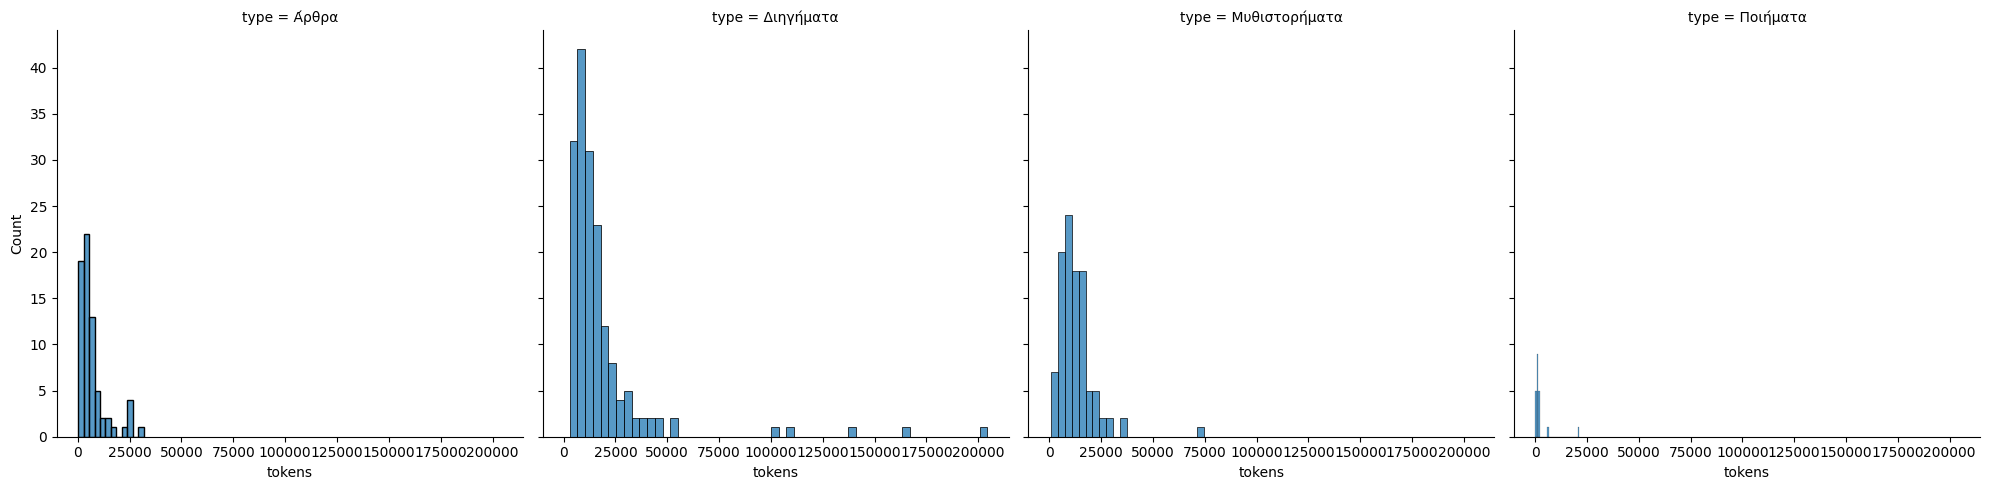

In [ ]:
import seaborn as sns

g = sns.FacetGrid(documents_df, col='type', height=5, sharex=True)
g.map(sns.histplot, 'tokens');

## Using text splitters

In [ ]:
from text_splitters import (text_splitter,
                            novel_splitter,
                            article_splitter,
                            short_story_splitter,
                            hymn_splitter)

In [ ]:
novels = text_splitter(novel_splitter, documents['Μυθιστορήματα'])
len(novels)

1697

In [ ]:
articles = text_splitter(article_splitter, documents['Άρθρα'])
len(articles)

1001

In [ ]:
stories = text_splitter(short_story_splitter, documents['Διηγήματα'])
len(stories)

4221

In [ ]:
poems = text_splitter(hymn_splitter, documents['Ποιήματα'])
len(poems)

137

In [ ]:
chunks = novels + articles + stories + poems

### Chunk Analysis

In [ ]:
chunks_df = pd.DataFrame([doc.metadata for doc in chunks])
chunks_df['Κείμενο'] = [doc.page_content for doc in chunks]
chunks_df['length'] = chunks_df['Κείμενο'].map(num_tokens_from_string)
chunks_df.info()
chunks_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7056 entries, 0 to 7055
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   type     7056 non-null   object
 1   theme    7056 non-null   object
 2   title    7056 non-null   object
 3   year     7056 non-null   int64 
 4   chapter  7056 non-null   object
 5   chunk    7056 non-null   int64 
 6   Κείμενο  7056 non-null   object
 7   length   7056 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 441.1+ KB


,type,theme,title,year,chapter,chunk,Κείμενο,length
0,Μυθιστορήματα,Άγνωστη,Ἡ Μετανάστις,1879,ΠΡΟΛΟΓΟΣ,0,Ὁ τελευταίως ἐνσκήψας ἐν Ἀστραχὰν λοιμὸς καὶ ο...,684
1,Μυθιστορήματα,Άγνωστη,Ἡ Μετανάστις,1879,ΚΕΦΑΛΑΙΟΝ Α´ - Η ΘΕΙΑ ΜΑΣΤΙΞ,0,Ἦτο τὸ ἔτος τῆς φοβερᾶς πανώλους τῆς Μασσαλίας...,849
2,Μυθιστορήματα,Άγνωστη,Ἡ Μετανάστις,1879,ΚΕΦΑΛΑΙΟΝ Α´ - Η ΘΕΙΑ ΜΑΣΤΙΞ,1,Τὰ ἐργαστήρια ἦσαν ὡσαύτως κεκλεισμένα. Μόνον ...,571
3,Μυθιστορήματα,Άγνωστη,Ἡ Μετανάστις,1879,ΚΕΦΑΛΑΙΟΝ Α´ - Η ΘΕΙΑ ΜΑΣΤΙΞ,2,Διότι πρὸ τῆς ἐνσκήψεως τοῦ δεινοῦ ὁ κληρικὸς ...,942
4,Μυθιστορήματα,Άγνωστη,Ἡ Μετανάστις,1879,ΚΕΦΑΛΑΙΟΝ Α´ - Η ΘΕΙΑ ΜΑΣΤΙΞ,3,"Ὁ γέρων προεπορεύετο πεντήκοντα βήματα, ἠναγκά...",969


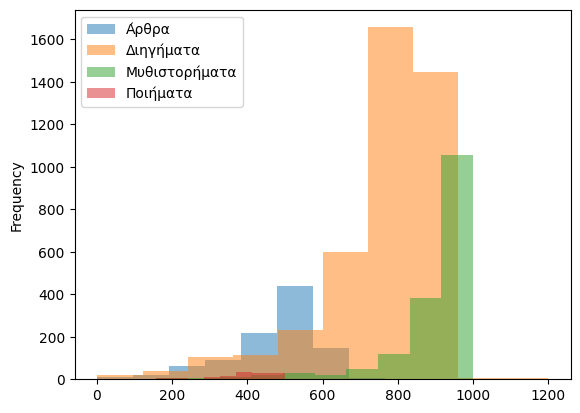

In [ ]:
chunks_df.groupby('type').length.plot.hist(legend=True, alpha=0.5);

In [ ]:
chunks_df.drop_duplicates(subset=['type', 'theme', 'title', 'year', 'chapter'])

,type,theme,title,year,chapter,chunk,Κείμενο,length
0,Μυθιστορήματα,Άγνωστη,Ἡ Μετανάστις,1879,ΠΡΟΛΟΓΟΣ,0,Ὁ τελευταίως ἐνσκήψας ἐν Ἀστραχὰν λοιμὸς καὶ ο...,684
1,Μυθιστορήματα,Άγνωστη,Ἡ Μετανάστις,1879,ΚΕΦΑΛΑΙΟΝ Α´ - Η ΘΕΙΑ ΜΑΣΤΙΞ,0,Ἦτο τὸ ἔτος τῆς φοβερᾶς πανώλους τῆς Μασσαλίας...,849
9,Μυθιστορήματα,Άγνωστη,Ἡ Μετανάστις,1879,ΚΕΦΑΛΑΙΟΝ Β´ - Η ΕΥΣΕΒΗΣ ΚΟΡΗ,0,Ὁ γέρων ναυτικὸς μετὰ τοῦ υἱοῦ αὐτοῦ ἀνέβησαν ...,780
18,Μυθιστορήματα,Άγνωστη,Ἡ Μετανάστις,1879,"ΚΕΦΑΛΑΙΟΝ Γ´ - «UNKNELL᾽D, UNCOFFIN᾽>D, AND UN...",0,"«UNKNELL᾽D, UNCOFFIN᾽>D, AND UNKNOWN»1\n(Βύρων...",982
28,Μυθιστορήματα,Άγνωστη,Ἡ Μετανάστις,1879,ΚΕΦΑΛΑΙΟΝ Δ´ - Η ΕΠΙΣΤΡΟΦΗ,0,"Εὐχαρίστως θὰ ἔδιδεν ὁ πλοίαρχος ὅ,τι εἶχεν, ἂ...",876
...,...,...,...,...,...,...,...,...
7042,Ποιήματα,Ποιήματα,ΜΙΑ ΨΥΧΗ,0,Not applied,0,"Ὁ ἄγγελος, ὡς λέγουν, τῆς ὑστάτης πορείας ξενα...",287
7045,Ποιήματα,Ποιήματα,ΕΙΣ ΤΗΝ ΜΝΗΜΗΝ ΤΟΥ ΕΠΑΜΕΙΝΩΝΔΑ ΔΕΛΗΓΕΩΡΓΗ,0,Not applied,0,Γυρτὴ εἶμ᾿ ἀπ᾿ τὸ βοριὰ ἀγριλιὰ καὶ χιονοφορτω...,168
7046,Ποιήματα,Ποιήματα,ΣΤΗΝ ΠΑΝΑΓΙΑ ΤΗΝ ΚΟΥΝΙΣΤΡΑ,0,Not applied,0,Εἰς ὅλην τὴν Χριστιανοσύνη μία εἶναι μόνη Πανα...,349
7050,Ποιήματα,Ποιήματα,ΤΟ ΩΡΑΙΟΝ ΦΑΣΜΑ,0,Not applied,0,(Στίχοι τῆς Πρωτομαγιᾶς)\n\nἈγάπης καὶ χαρᾶς ἀ...,402


## Creating Embeddings and storing them

In [ ]:
import weaviate
from weaviate.classes.init import Auth

# Best practice: store your credentials in environment variables
weaviate_url = userdata.get("WEAVIATE_URL")
weaviate_api_key = userdata.get("WEAVIATE_API_KEY")

# Connect to Weaviate Cloud
weaviate_client = weaviate.connect_to_weaviate_cloud(
    cluster_url=weaviate_url,
    auth_credentials=Auth.api_key(weaviate_api_key),
)

print(weaviate_client.is_ready())  # Should print: `True`

True


In [ ]:
novels[0]

Document(metadata={'type': 'Μυθιστορήματα', 'theme': 'Άγνωστη', 'title': 'Ἡ Μετανάστις', 'year': 1879, 'chapter': 'ΠΡΟΛΟΓΟΣ', 'chunk': 0}, page_content='Ὁ τελευταίως ἐνσκήψας ἐν Ἀστραχὰν λοιμὸς καὶ οἱ φόβοι, οἵτινες ἐξεφράσθησαν ἐν Εὐρώπῃ εἰς τὸ ἄκουσμα τοῦτο, ἀνέμνησαν ἡμῖν τὴν ἱστορίαν Ἑλληνίδος κόρης, ἧς οἱ γονεῖς ἀπέθανον ἐν Μασσαλίᾳ ἐκ τοῦ λοιμοῦ τοῦ 1720· αὕτη δέ, καίπερ σωθεῖσα ἐκ τοῦ θανάτου διὰ τῆς φυγῆς, δὲν ὑπῆρξεν ἧττον δυστυχὴς ἕνεκα τούτου.\nΤὴν ἱστορίαν ταύτην ἠρύσθημεν ἐκ τῶν σημειώσεων τοῦ γηραιοῦ ἡμῶν φίλου κ. Ἰω. Βαλσάμη, σημειώσεων, ἃς ἐκληρονόμησε παρὰ τῆς ἐν μακαρίᾳ τῇ λήξει μάμμης αὐτοῦ. Προσφέρομεν δὲ αὐτὴν τοῖς ἀναγνώσταις τοῦ Νεολόγου, εὐχόμενοι νὰ εὕρωσιν αὐτὴν ἀναγνώσεως ἀξίαν.\nἘν Ἀθήναις, … 1879.\nΜΕΡΟΣ ΠΡΩΤΟΝ')

In [ ]:
from langchain_huggingface.embeddings import HuggingFaceEmbeddings
from langchain_weaviate.vectorstores import WeaviateVectorStore

embeddings = HuggingFaceEmbeddings(model_name="BAAI/bge-m3", show_progress=True)

for name, docs in [("novels", novels), ("stories", stories), ("articles", articles), ("poems", poems)]:
    vectorstore = WeaviateVectorStore.from_documents(
    docs, embeddings, client=weaviate_client, tenant=name, index_name='PapadiamantisLangchain', text_key='text')

2025-Apr-26 06:22 PM - langchain_weaviate.vectorstores - INFO - Tenant novels does not exist in index PapadiamantisLangchain. Creating tenant.
INFO:langchain_weaviate.vectorstores:Tenant novels does not exist in index PapadiamantisLangchain. Creating tenant.


Batches:   0%|          | 0/54 [00:00<?, ?it/s]

2025-Apr-26 06:24 PM - langchain_weaviate.vectorstores - INFO - Tenant stories does not exist in index PapadiamantisLangchain. Creating tenant.
INFO:langchain_weaviate.vectorstores:Tenant stories does not exist in index PapadiamantisLangchain. Creating tenant.


Batches:   0%|          | 0/132 [00:00<?, ?it/s]

2025-Apr-26 06:30 PM - langchain_weaviate.vectorstores - INFO - Tenant articles does not exist in index PapadiamantisLangchain. Creating tenant.
INFO:langchain_weaviate.vectorstores:Tenant articles does not exist in index PapadiamantisLangchain. Creating tenant.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2025-Apr-26 06:31 PM - langchain_weaviate.vectorstores - INFO - Tenant poems does not exist in index PapadiamantisLangchain. Creating tenant.
INFO:langchain_weaviate.vectorstores:Tenant poems does not exist in index PapadiamantisLangchain. Creating tenant.


Batches:   0%|          | 0/5 [00:00<?, ?it/s]